# Analysis corpus SPARQL

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium
import VizKG.visualize as vkg
import plotly.express as px
import markdown as md

In [3]:
endpoint = "http://localhost:3030/VisualContagions/sparql"

## Count of manifests

In [3]:
count_manifests ="""

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?manifest) as ?nOfManifests)  WHERE {
  ?manifest crm:P2_has_type <https://lod.unige.ch/vc/type/cluster> .
}




"""

In [4]:
count_manifests = sparql_dataframe.get(endpoint, count_manifests)

In [5]:
print(count_manifests)

   nOfManifests
0        197480


## Count of Images

In [5]:
count_images ="""

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>

SELECT DISTINCT ?image WHERE {
  
  ?image a crm:E36_Visual_Item .
  ?image ?pred ?manifests .
  ?manifests <http://www.cidoc-crm.org/cidoc-crm/P108i_was_produced_by> ?production ;
             rdfs:label ?labelIssue .
} 
"""

In [6]:
count_images = sparql_dataframe.get(endpoint, count_images)

In [7]:
count_images

,image
0,https://digi.ub.uni-heidelberg.de/iiif/2/zimme...
1,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k61...
2,https://digi.ub.uni-heidelberg.de/iiif/2/bhs19...
3,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
4,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k61...
...,...
856332,https://iiif.unige.ch/iiif/2/fedora_ug27803650...
856333,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
856334,https://digi.ub.uni-heidelberg.de/iiif/2/megge...
856335,https://digi.ub.uni-heidelberg.de/iiif/2/inter...


## Count of journals

In [6]:
count_journals ="""

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>

SELECT (count(distinct ?serials) as ?nOfserials)  WHERE {
  ?serials crm:P2_has_type aat:300215390 .
}
"""

In [7]:
count_journals = sparql_dataframe.get(endpoint, count_journals)

In [8]:
print(count_journals)

   nOfserials
0        1787


### Count of AG journals

In [29]:
ag_journals ="""

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>

SELECT DISTINCT ?labelIssue WHERE {
  
  ?manifests <http://www.cidoc-crm.org/cidoc-crm/P108i_was_produced_by> ?production ;
             ?type <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> ;
             rdfs:label ?labelIssue .
}

"""

In [30]:
ag_journals = sparql_dataframe.get(endpoint, ag_journals)

In [31]:
ag_journals.nunique()

labelIssue    98
dtype: int64

### Count of AG images

In [32]:
ag_images ="""

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>

SELECT DISTINCT ?image WHERE {
  
  ?image a crm:E36_Visual_Item .
  ?image ?pred ?manifests .
  ?manifests <http://www.cidoc-crm.org/cidoc-crm/P108i_was_produced_by> ?production ;
             ?type <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> ;
             rdfs:label ?labelIssue .
} 

"""

In [33]:
ag_images = sparql_dataframe.get(endpoint, ag_images)

## Count of countries

In [9]:
count_countries ="""

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>


SELECT ?(count(distinct ?country) as ?nOfcountries)  WHERE {
  ?country crm:P2_has_type aat:300387506 .}
 
"""

In [10]:
count_countries = sparql_dataframe.get(endpoint, count_countries)

In [11]:
print(count_countries)

   nOfcountries
0            42


## Count of cities

In [12]:
count_cities ="""

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>

SELECT (count(distinct ?cities) as ?nOfcities)  WHERE {
  ?cities crm:P2_has_type aat:300008389 .
}
"""

In [13]:
count_cities = sparql_dataframe.get(endpoint, count_cities)

In [14]:
print(count_cities)

   nOfcities
0        278


### Count of countries per issue

In [5]:
countries_number = """

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX aat: <http://vocab.getty.edu/aat/>

SELECT ?countryLabel (count(distinct ?issue) as ?nOfissue) WHERE {
  
 		?issue crm:P108i_was_produced_by ?production .
        ?production  crm:P7_took_place_at ?country .
  
        ?country crm:P2_has_type aat:300387506 ;
                rdfs:label ?countryLabel .
}
GROUP BY ?countryLabel
"""

In [6]:
countries_number = sparql_dataframe.get(endpoint, countries_number)

In [7]:
countries_number.to_csv('/Users/carboni/Downloads/countries_number.csv', index=False)

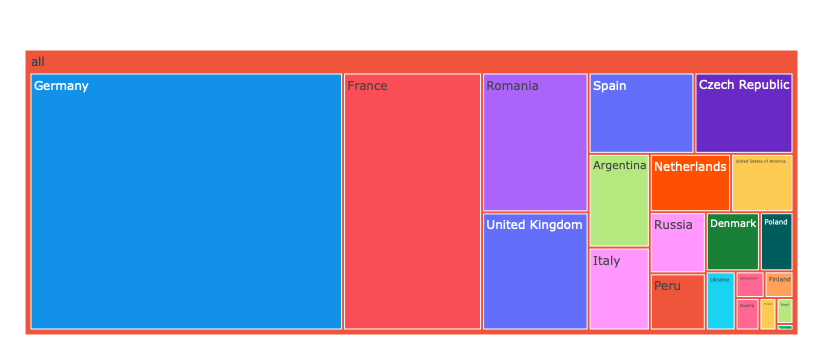

In [69]:
import plotly.express as px

fig = px.treemap(countries_number, path=[px.Constant("all"), 'countryLabel'], values='nOfissue',
                color='countryLabel',
                color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038"  })
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.write_image("treemap_countries_ag.png", scale=10) 
fig.show()